In [1]:
cd ..

/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering


In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
from matplotlib import cm
from importlib import reload
from scipy.optimize import fmin, minimize

In [3]:
from filtering.utils import simulate as sim
from filtering.filtering import kf

# Simulating Data

In [4]:
# S0 = 149.54
S0 = 100
# r = 0.0245
r = 0.2
q = 0
N = 1000

In [5]:
true_params = [r, 2.2, 0.01, 0.3, -0.6, 0.02]
init_params = [0.6, 1.1, 0.03, 0.35, -0.4, 0.035]

In [6]:
y = sim.simulate_heston_state(true_params, S0, N=N)
obs = np.array(y[0,:])[0]

In [7]:
reload(kf)

<module 'filtering.filtering.kf' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/filtering/filtering/kf.py'>

In [8]:
ukf = kf.UKFHeston(obs, is_log=True)

In [9]:
x_preds, y_preds = ukf.filter(obs, init_params)

### simulate path and ekf generated path

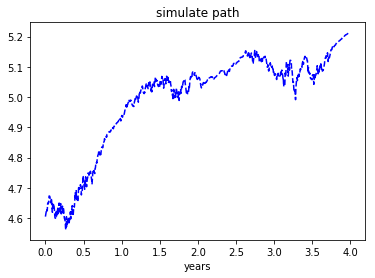

In [10]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.title('simulate path')
plt.xlabel('years')
plt.show()

before param. estimation
# neg vol: [[23]]


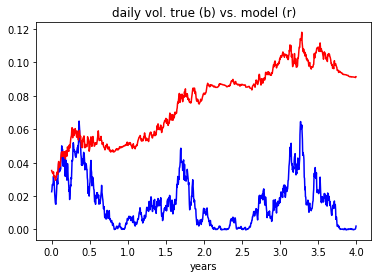

In [11]:
print('before param. estimation')
print("# neg vol:", sum(y[1,:].T<0))
plt.plot(years[:], np.array(y[1,1:])[0], 'b-')
plt.plot(years[:], x_preds[1:], 'r-')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()

# Filtering

## Optimize

In [12]:
reload(kf)

<module 'filtering.filtering.kf' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/filtering/filtering/kf.py'>

In [13]:
ukf = kf.UKFHeston(obs, is_log=True)

In [14]:
def param_select(params1, params2, n_alphas=1000):
    params1 = np.array(params1)
    params2 = np.array(params2)
    alphas = np.linspace(0, 1, n_alphas)
    params = [a*params1+(1-a)*params2 for a in alphas]
    objs = [wrap_heston_obj(p, *args) for p in params]
    return objs

In [15]:
print("Init params: {}".format(init_params))
print("True Params: {}".format(true_params))

Init params: [0.6, 1.1, 0.03, 0.35, -0.4, 0.035]
True Params: [0.2, 2.2, 0.01, 0.3, -0.6, 0.02]


In [27]:
xopt = ukf.optimize(xopt, maxiter=250)

[0.22516757910503038, 2.999983686626255, 0.0083153080052469, 0.14561673579157297, -0.7664080305201872, 0.09489080353442242]
[ 0.22516758  3.00001631  0.00831531  0.14561674 -0.76640803  0.0948908 ]
[ 0.23642596  3.00001631  0.00831531  0.14561674 -0.76640803  0.0948908 ]
[ 0.22516758  3.15001713  0.00831531  0.14561674 -0.76640803  0.0948908 ]
[ 0.22516758  3.00001631  0.00873107  0.14561674 -0.76640803  0.0948908 ]
[ 0.22516758  3.00001631  0.00831531  0.15289757 -0.76640803  0.0948908 ]
[ 0.22516758  3.00001631  0.00831531  0.14561674 -0.80472843  0.0948908 ]
[ 0.22516758  3.00001631  0.00831531  0.14561674 -0.76640803  0.09963534]
[ 0.22892037  2.8500155   0.0084539   0.14804368 -0.7791815   0.09647232]
[ 0.22610578  3.07501672  0.00834996  0.14622347 -0.7696014   0.09528618]
i: 1
x_i: [ 0.22516758  3.00001631  0.00831531  0.14561674 -0.76640803  0.0948908 ]
[ 0.22516758  3.00001631  0.00831531  0.14561674 -0.76640803  0.0948908 ]
f_i: -8.790438513725709
[ 0.22798217  2.92501591  0.

[ 0.22843712  2.99907393  0.00818185  0.14220298 -0.79946338  0.09429113]
i: 26
x_i: [ 0.22843712  2.99907393  0.00818185  0.14220298 -0.79946338  0.09429113]
[ 0.22843712  2.99907393  0.00818185  0.14220298 -0.79946338  0.09429113]
f_i: -8.790539473373139
[ 0.22607737  2.99702501  0.00818763  0.14194694 -0.79715342  0.0935321 ]
[ 0.22912724  3.00056118  0.0081603   0.14196248 -0.79416961  0.09459832]
i: 27
x_i: [ 0.22912724  3.00056118  0.0081603   0.14196248 -0.79416961  0.09459832]
[ 0.22912724  3.00056118  0.0081603   0.14196248 -0.79416961  0.09459832]
f_i: -8.790548840349922
[ 0.22865552  3.00233474  0.00820147  0.14082062 -0.79861115  0.09259131]
[ 0.22813095  2.99868088  0.00815768  0.14231349 -0.79390056  0.09482568]
i: 28
x_i: [ 0.22912724  3.00056118  0.0081603   0.14196248 -0.79416961  0.09459832]
[ 0.22912724  3.00056118  0.0081603   0.14196248 -0.79416961  0.09459832]
f_i: -8.790548840349922
[ 0.22722263  3.00164103  0.00817217  0.14356799 -0.79535035  0.09528814]
[ 0.228

f_i: -8.790778389182377
[ 0.25066002  3.0006165   0.00722877  0.13226112 -0.8550554   0.0952176 ]
i: 54
x_i: [ 0.24787889  2.99963536  0.00737807  0.13305976 -0.85611663  0.09476241]
[ 0.24787889  2.99963536  0.00737807  0.13305976 -0.85611663  0.09476241]
f_i: -8.790778389182377
[ 0.24597619  3.00130123  0.00745967  0.1374335  -0.83472124  0.09430297]
i: 55
x_i: [ 0.24787889  2.99963536  0.00737807  0.13305976 -0.85611663  0.09476241]
[ 0.24787889  2.99963536  0.00737807  0.13305976 -0.85611663  0.09476241]
f_i: -8.790778389182377
[ 0.25026957  3.00157767  0.00728968  0.13622627 -0.84302971  0.09559418]
i: 56
x_i: [ 0.24787889  2.99963536  0.00737807  0.13305976 -0.85611663  0.09476241]
[ 0.24787889  2.99963536  0.00737807  0.13305976 -0.85611663  0.09476241]
f_i: -8.790778389182377
[ 0.25289898  3.0005926   0.00724583  0.13497086 -0.85050615  0.0953604 ]
i: 57
x_i: [ 0.24787889  2.99963536  0.00737807  0.13305976 -0.85611663  0.09476241]
[ 0.24787889  2.99963536  0.00737807  0.133059

[ 0.2520593   2.99975171  0.00722404  0.13089366 -0.87242838  0.09447976]
i: 81
x_i: [ 0.25269376  2.99990758  0.00719305  0.13112548 -0.87089385  0.09467141]
[ 0.25269376  2.99990758  0.00719305  0.13112548 -0.87089385  0.09467141]
f_i: -8.79079772619859
[ 0.25137194  2.99996259  0.00723911  0.13118272 -0.86743356  0.0946765 ]
[ 0.24973951  2.99989382  0.00730265  0.13105895 -0.86555671  0.09453722]
i: 82
x_i: [ 0.25137194  2.99996259  0.00723911  0.13118272 -0.86743356  0.0946765 ]
[ 0.25137194  2.99996259  0.00723911  0.13118272 -0.86743356  0.0946765 ]
f_i: -8.790797852519697
[ 0.25000506  2.9997166   0.00728771  0.13197886 -0.86378176  0.09459444]
[ 0.25363557  3.00011682  0.00715244  0.13107316 -0.87068621  0.09485884]
i: 83
x_i: [ 0.25137194  2.99996259  0.00723911  0.13118272 -0.86743356  0.0946765 ]
[ 0.25137194  2.99996259  0.00723911  0.13118272 -0.86743356  0.0946765 ]
f_i: -8.790797852519697
[ 0.25310737  3.00017958  0.00717387  0.13059693 -0.87304443  0.09464137]
[ 0.2535

i: 108
x_i: [ 0.25462938  3.00005884  0.00714279  0.12689449 -0.89620927  0.0939579 ]
[ 0.25462938  3.00005884  0.00714279  0.12689449 -0.89620927  0.0939579 ]
f_i: -8.790809366539102
[ 0.25419517  3.00019798  0.00715773  0.12713366 -0.89410131  0.09399726]
[ 0.25316334  2.99996536  0.00719314  0.12774455 -0.88985555  0.09398104]
i: 109
x_i: [ 0.25316334  2.99996536  0.00719314  0.12774455 -0.88985555  0.09398104]
[ 0.25316334  2.99996536  0.00719314  0.12774455 -0.88985555  0.09398104]
f_i: -8.790809494512423
[ 0.25263625  2.99994362  0.00722399  0.12793048 -0.88952562  0.09370483]
[ 0.253715    3.00005938  0.00717022  0.12745736 -0.89155081  0.09407344]
i: 110
x_i: [ 0.25316334  2.99996536  0.00719314  0.12774455 -0.88985555  0.09398104]
[ 0.25316334  2.99996536  0.00719314  0.12774455 -0.88985555  0.09398104]
f_i: -8.790809494512423
[ 0.2534346   2.99995784  0.00717402  0.12899077 -0.88285159  0.09438877]
[ 0.25339809  3.0000477   0.0071892   0.12715559 -0.89350987  0.09383667]
i: 1

[ 0.25322478  2.99957325  0.00715527  0.12334419 -0.92144297  0.09435783]
i: 136
x_i: [ 0.25322478  2.99957325  0.00715527  0.12334419 -0.92144297  0.09435783]
[ 0.25322478  2.99957325  0.00715527  0.12334419 -0.92144297  0.09435783]
f_i: -8.790822923905901
[ 0.25517888  2.99956596  0.00708511  0.12224482 -0.93145959  0.09442846]
[ 0.25484123  2.99941668  0.00708767  0.12079914 -0.9419477   0.09452591]
i: 137
x_i: [ 0.25484123  2.99941668  0.00708767  0.12079914 -0.9419477   0.09452591]
[ 0.25484123  2.99941668  0.00708767  0.12079914 -0.9419477   0.09452591]
f_i: -8.790828876702403
[ 0.25407728  2.99937216  0.00711063  0.12198904 -0.93404926  0.09459932]
i: 138
x_i: [ 0.25484123  2.99941668  0.00708767  0.12079914 -0.9419477   0.09452591]
[ 0.25484123  2.99941668  0.00708767  0.12079914 -0.9419477   0.09452591]
f_i: -8.790828876702403
[ 0.25356195  2.9993973   0.00714011  0.12096052 -0.93985918  0.09423179]
[ 0.25222982  2.99922215  0.00718385  0.11921504 -0.95155863  0.094068  ]
i: 1

f_i: -8.79084191081056
[ 0.25708206  2.99916489  0.00698298  0.11386944 -0.99793602  0.09427089]
i: 164
x_i: [ 0.25635009  2.99937449  0.00701651  0.11680371 -0.97562471  0.09433101]
[ 0.25635009  2.99937449  0.00701651  0.11680371 -0.97562471  0.09433101]
f_i: -8.79084191081056
[ 0.25414682  2.99907226  0.00709173  0.11448538 -0.99077678  0.09399825]
i: 165
x_i: [ 0.25635009  2.99937449  0.00701651  0.11680371 -0.97562471  0.09433101]
[ 0.25635009  2.99937449  0.00701651  0.11680371 -0.97562471  0.09433101]
f_i: -8.79084191081056
[ 0.25456401  2.99899566  0.00707203  0.11325531 -1.00115746  0.09401406]
[ 0.25580409  2.99922788  0.00703448  0.11601169 -0.9804896   0.09432098]
i: 166
x_i: [ 0.25635009  2.99937449  0.00701651  0.11680371 -0.97562471  0.09433101]
[ 0.25635009  2.99937449  0.00701651  0.11680371 -0.97562471  0.09433101]
f_i: -8.79084191081056
[ 0.25635606  2.99927544  0.00701864  0.1159783  -0.98226708  0.09415355]
[ 0.25714906  2.99937512  0.00699539  0.11663818 -0.978655

f_i: -8.790845500953099
[ 0.25677733  2.99922546  0.00699049  0.11443713 -0.99776006  0.09398171]
i: 192
x_i: [ 0.25657863  2.99923388  0.00699954  0.11449589 -0.99546882  0.09405716]
[ 0.25657863  2.99923388  0.00699954  0.11449589 -0.99546882  0.09405716]
f_i: -8.790845500953099
[ 0.25636765  2.9991494   0.00700647  0.11376573 -1.00186876  0.0938815 ]
[ 0.2570484   2.99928951  0.00698389  0.11489525 -0.99308517  0.09408587]
i: 193
x_i: [ 0.25657863  2.99923388  0.00699954  0.11449589 -0.99546882  0.09405716]
[ 0.25657863  2.99923388  0.00699954  0.11449589 -0.99546882  0.09405716]
f_i: -8.790845500953099
[ 0.25638851  2.99916474  0.00700149  0.11414146 -0.9979893   0.09414743]
i: 194
x_i: [ 0.25657863  2.99923388  0.00699954  0.11449589 -0.99546882  0.09405716]
[ 0.25657863  2.99923388  0.00699954  0.11449589 -0.99546882  0.09405716]
f_i: -8.790845500953099
[ 0.25726482  2.99927114  0.00697373  0.11427218 -0.99816645  0.09407357]
[ 0.25772618  2.99930862  0.00695675  0.11410367 -0.99

i: 219
x_i: [ 0.2575497   2.99932831  0.00696315  0.11416385 -0.99949083  0.09409373]
[ 0.2575497   2.99932831  0.00696315  0.11416385 -0.99949083  0.09409373]
f_i: -8.79084673330365
[ 0.25745677  2.9993191   0.00696516  0.11405829 -0.99990026  0.09413405]
[ 0.25774169  2.99935037  0.00695521  0.11398352 -1.00068591  0.09413749]
i: 220
x_i: [ 0.25745677  2.9993191   0.00696516  0.11405829 -0.99990026  0.09413405]
[ 0.25745677  2.9993191   0.00696516  0.11405829 -0.99990026  0.09413405]
f_i: -8.790846863706994
[ 0.2570574   2.99926816  0.00697766  0.11397605 -1.00067935  0.09411165]
[ 0.25726103  2.99929984  0.00697243  0.11416809 -0.99877293  0.09413718]
i: 221
x_i: [ 0.25745677  2.9993191   0.00696516  0.11405829 -0.99990026  0.09413405]
[ 0.25745677  2.9993191   0.00696516  0.11405829 -0.99990026  0.09413405]
f_i: -8.790846863706994
[ 0.25729435  2.99931518  0.00697103  0.11416702 -0.99902377  0.0941356 ]
[ 0.25737442  2.99933652  0.0069685   0.11421409 -0.99876665  0.0941406 ]
i: 22

i: 247
x_i: [ 0.25835865  2.99998507  0.0069369   0.11524407 -0.99055577  0.09444917]
[ 0.25835865  2.99998507  0.0069369   0.11524407 -0.99055577  0.09444917]
f_i: -8.790853283838384
[ 0.2584001   3.00010627  0.00693378  0.11527711 -0.98955943  0.09457027]
[ 0.25817454  2.99987817  0.00694181  0.11494507 -0.99249908  0.09444486]
i: 248
x_i: [ 0.25835865  2.99998507  0.0069369   0.11524407 -0.99055577  0.09444917]
[ 0.25835865  2.99998507  0.0069369   0.11524407 -0.99055577  0.09444917]
f_i: -8.790853283838384
[ 0.25750436  2.99992963  0.00696298  0.11514501 -0.99000501  0.0945494 ]
[ 0.25686157  2.99991763  0.00698351  0.11523695 -0.98855762  0.09460952]
i: 249
x_i: [ 0.25686157  2.99991763  0.00698351  0.11523695 -0.98855762  0.09460952]
[ 0.25686157  2.99991763  0.00698351  0.11523695 -0.98855762  0.09460952]
f_i: -8.790853674775898


# Plot Results

In [28]:
x_preds, y_preds = ukf.filter(obs, xopt)

In [29]:
print(xopt)
print(true_params)

[ 0.25686157  2.99991763  0.00698351  0.11523695 -0.98855762  0.09460952]
[0.2, 2.2, 0.01, 0.3, -0.6, 0.02]


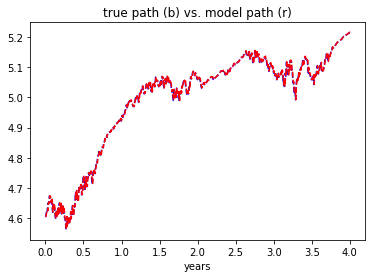

In [30]:
years = np.arange(y.shape[-1]) * (1/250)
plt.plot(years[:], y[0,:].T, 'b--')
plt.plot(years[:], y_preds[:], 'r--')
plt.title('true path (b) vs. model path (r)')
plt.xlabel('years')
plt.show()

# neg vol: [[23]]


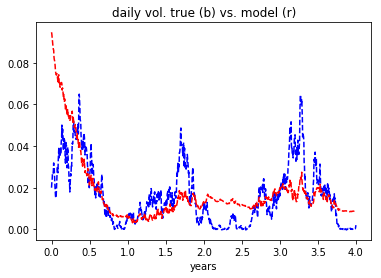

In [31]:
print("# neg vol:", sum(y[1,:].T<0))
plt.plot(years[:], np.array(y[1,:])[0], 'b--')
plt.plot(years[:], x_preds[:], 'r--')
plt.title('daily vol. true (b) vs. model (r)')
plt.xlabel('years')
plt.show()